<a href="https://colab.research.google.com/github/banggaadi/banggaadi.github.io/blob/master/1101180135_Bangga_Adi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def ploss(fc,ht,d,area,hg) :

  #nilai c1 & c2
  if fc in range(150,1500):
        c1 = 69.55
        c2 = 26.16
  elif fc in range(1501,2001):
    c1 = 46.3
    c2 = 33.9
  
  #nilai cm
  if area == "urban":
    cm = 0
  elif area == "suburb":
    cm = -2*((np.log10((fc/28)**2))-5.4)
  elif area == "open":
    cm = -4.78*(np.log10(fc)) + (18.33*np.log10(fc)) - 40.94


 
  ahg = (1.1*np.log10(fc)-0.7)*hg-(1.56*np.log10(fc)-1.8)
  Lp = c1+(c2*np.log10(fc))-(13.83*np.log(ht))-ahg+((44.9-6.55*np.log10(ht))*np.log10(d))- cm
  return Lp

In [4]:
f = 1800
hTower = 80 
hUser = 1.5
dMin = 200 
dMax = 700 
N = 200
d = np.random.randint(dMin,dMax,N)

In [5]:
#Gambar1

LpUrban = ploss(f,hTower,d,"urban",hUser)
LpSuburb = ploss(f,hTower,d,"suburb",hUser)
LpOpen = ploss(f,hTower,d,"open",hUser)

d_sort=d[np.argsort(d)]
Urban_sort=LpUrban[np.argsort(d)]
Suburb_sort=LpSuburb[np.argsort(d)]
Open_sort=LpOpen[np.argsort(d)]

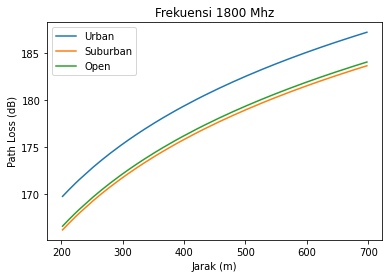

In [6]:
plt.figure()
plt.plot(d_sort,Urban_sort, label = "Urban") #x,y
plt.plot(d_sort,Suburb_sort,label = "Suburban")
plt.plot(d_sort,Open_sort, label = "Open")
plt.legend()
plt.title("Frekuensi 1800 Mhz")
plt.xlabel('Jarak (m)')
plt.ylabel('Path Loss (dB)')
plt.show()

In [7]:
LpU700 = ploss(700,hTower,d,"urban",hUser)
LpU900 = ploss(900,hTower,d,"urban",hUser)
LpU1800 = ploss(1800,hTower,d,"urban",hUser)

d_sort=d[np.argsort(d)]
U700_sort=LpU700[np.argsort(d)]
U900_sort=LpU900[np.argsort(d)]
U1800_sort=LpU1800[np.argsort(d)]

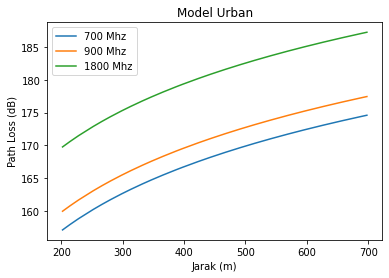

In [8]:
plt.figure()
plt.plot(d_sort,U700_sort, label = "700 Mhz") #x,y
plt.plot(d_sort,U900_sort,label = "900 Mhz")
plt.plot(d_sort,U1800_sort, label = "1800 Mhz")
plt.legend()
plt.title("Model Urban")
plt.xlabel('Jarak (m)')
plt.ylabel('Path Loss (dB)')
plt.show()